# ESTIMATION OF COVID-19 PANDEMIC

### Loading Data

We will use data on COVID-19 infected individuals, provided by the [Center for Science and Engineering](https://systems.jhu.edu/) (CSSE) at [Johns Hopkins University](https://jhu.edu/). Dataset is available in [this Github repository](https://github.com/CSSEGISandData/COVID-19)

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10, 3)

In [62]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/"
infected_dataset_url = url + "time_series_covid19_confirmed_global.csv"
recovered_dataset_url = url + "time_series_covid19_recovered_global.csv"
deaths_dataset_url = url + "time_series_covid19_deaths_global.csv"
countries_dataset_url = url + "../UID_ISO_FIPS_LookUp_Table.csv"

Let's load the data for infected individuals 

In [40]:
infected = pd.read_csv(infected_dataset_url, index_col='Country/Region')
infected.head()

,Province/State,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,NaN,42.50630,1.521800,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,NaN,-11.20270,17.873900,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


In [41]:
recovered = pd.read_csv(recovered_dataset_url, index_col ='Country/Region')
deaths = pd.read_csv(deaths_dataset_url, index_col = 'Country/Region')

### Making Sense of the Data

from the table above, the role of province column is not clear. let's explore it

In [42]:
infected.columns

Index(['Province/State', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1146)

In [8]:
print(infected["Province/State"].value_counts())

Province/State
Australian Capital Territory    1
Saint Pierre and Miquelon       1
Reunion                         1
New Caledonia                   1
Mayotte                         1
                               ..
Gansu                           1
Fujian                          1
Chongqing                       1
Beijing                         1
Turks and Caicos Islands        1
Name: count, Length: 91, dtype: int64


let's explore the infected individuals in China

In [12]:
'China' in infected['Country/Region'].unique()

True

In [13]:
infected[infected['Country/Region'] == 'China']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
59,Anhui,China,31.8257,117.2264,1,9,15,39,60,70,...,2275,2275,2275,2275,2275,2275,2275,2275,2275,2275
60,Beijing,China,40.1824,116.4142,14,22,36,41,68,80,...,40774,40774,40774,40774,40774,40774,40774,40774,40774,40774
61,Chongqing,China,30.0572,107.8740,6,9,27,57,75,110,...,14715,14715,14715,14715,14715,14715,14715,14715,14715,14715
62,Fujian,China,26.0789,117.9874,1,5,10,18,35,59,...,17122,17122,17122,17122,17122,17122,17122,17122,17122,17122
63,Gansu,China,35.7518,104.2861,0,2,2,4,7,14,...,1742,1742,1742,1742,1742,1742,1742,1742,1742,1742
64,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,103248,103248,103248,103248,103248,103248,103248,103248,103248,103248
65,Guangxi,China,23.8298,108.7881,2,5,23,23,36,46,...,13371,13371,13371,13371,13371,13371,13371,13371,13371,13371
66,Guizhou,China,26.8154,106.8748,1,3,3,4,5,7,...,2534,2534,2534,2534,2534,2534,2534,2534,2534,2534
67,Hainan,China,19.1959,109.7453,4,5,8,19,22,33,...,10483,10483,10483,10483,10483,10483,10483,10483,10483,10483
68,Hebei,China,39.5490,116.1306,1,1,2,8,13,18,...,3292,3292,3292,3292,3292,3292,3292,3292,3292,3292


### Pre-processing the Data

We are not interested in breaking countries down to further territories, thus we would first get rid of this breakdown and add information on all territories together, to get info foe the whole country.

In [27]:
infected = infected.groupby('Country/Region').sum()
recovered = recovered.groupby('Country/Region').sum()
deaths = deaths.groupby('Country/Region').sum()

infected.head()

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


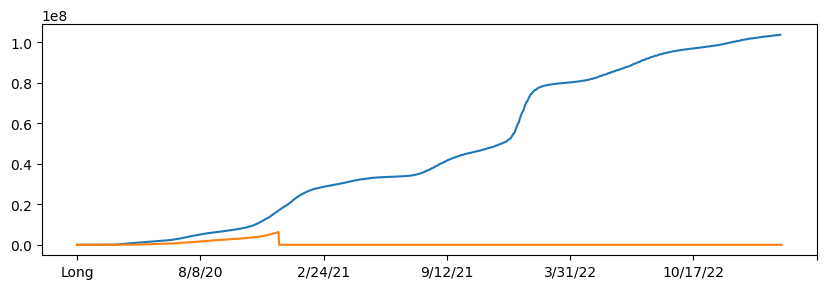

In [28]:
infected.loc['US'][2:].plot()
recovered.loc['US'][2:].plot()
plt.show()


In [43]:
recovered.columns

Index(['Province/State', 'Lat', 'Long', '1/22/20', '1/23/20', '1/24/20',
       '1/25/20', '1/26/20', '1/27/20', '1/28/20',
       ...
       '2/28/23', '3/1/23', '3/2/23', '3/3/23', '3/4/23', '3/5/23', '3/6/23',
       '3/7/23', '3/8/23', '3/9/23'],
      dtype='object', length=1146)

### Investigating the Data

Let's now switch to investigating a specific country. Let's create a frame that contains the Data on infections indexed by date:

In [13]:
'US' in infected['Country/Region'].unique()

True

In [46]:
deaths.drop(columns=['Lat', 'Long'])

,Province/State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,NaN,0,0,0,0,0,0,0,0,0,...,7896,7896,7896,7896,7896,7896,7896,7896,7896,7896
Albania,NaN,0,0,0,0,0,0,0,0,0,...,3598,3598,3598,3598,3598,3598,3598,3598,3598,3598
Algeria,NaN,0,0,0,0,0,0,0,0,0,...,6881,6881,6881,6881,6881,6881,6881,6881,6881,6881
Andorra,NaN,0,0,0,0,0,0,0,0,0,...,165,165,165,165,165,165,165,165,165,165
Angola,NaN,0,0,0,0,0,0,0,0,0,...,1933,1933,1933,1933,1933,1933,1933,1933,1933,1933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,NaN,0,0,0,0,0,0,0,0,0,...,5708,5708,5708,5708,5708,5708,5708,5708,5708,5708
Winter Olympics 2022,NaN,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Yemen,NaN,0,0,0,0,0,0,0,0,0,...,2159,2159,2159,2159,2159,2159,2159,2159,2159,2159


In [ ]:
infected.drop(columns=['Lat', 'Long'])
recovered.drop(columns = ['Lat', 'Long'])
deaths.drop(columns=['Lat', 'long'])

In [51]:
print(infected[:5])

               Province/State       Lat       Long  1/22/20  1/23/20  1/24/20  \
Country/Region                                                                  
Afghanistan               NaN  33.93911  67.709953        0        0        0   
Albania                   NaN  41.15330  20.168300        0        0        0   
Algeria                   NaN  28.03390   1.659600        0        0        0   
Andorra                   NaN  42.50630   1.521800        0        0        0   
Angola                    NaN -11.20270  17.873900        0        0        0   

                1/25/20  1/26/20  1/27/20  1/28/20  ...  2/28/23  3/1/23  \
Country/Region                                      ...                    
Afghanistan           0        0        0        0  ...   209322  209340   
Albania               0        0        0        0  ...   334391  334408   
Algeria               0        0        0        0  ...   271441  271448   
Andorra               0        0        0        0  

In [52]:
date_cols = infected.columns[4:]

def mkframe(country):
    df = pd.DataFrame({"infected" : infected.loc[country, date_cols],
                       "recovered" : recovered.loc[country, date_cols],
                       "deaths" : deaths.loc[country, date_cols]})
    df.index = pd.to_datetime(date_cols)
    return df

df = mkframe('US')
df

C:\Users\Danhaya\AppData\Local\Temp\ipykernel_15220\3971103730.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.index = pd.to_datetime(date_cols)


,infected,recovered,deaths
2020-01-23,1,0,0
2020-01-24,2,0,0
2020-01-25,2,0,0
2020-01-26,5,0,0
2020-01-27,5,0,0
...,...,...,...
2023-03-05,103646975,0,1122134
2023-03-06,103655539,0,1122181
2023-03-07,103690910,0,1122516
2023-03-08,103755771,0,1123246


In [35]:
recovered.drop(columns='Province/State', inplace=True)
deaths.drop(columns='Province/State', inplace=True)
infected[:5]

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/28/23,3/1/23,3/2/23,3/3/23,3/4/23,3/5/23,3/6/23,3/7/23,3/8/23,3/9/23
Country/Region,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,209322,209340,209358,209362,209369,209390,209406,209436,209451,209451
Albania,0,0,0,0,0,0,0,0,0,0,...,334391,334408,334408,334427,334427,334427,334427,334427,334443,334457
Algeria,0,0,0,0,0,0,0,0,0,0,...,271441,271448,271463,271469,271469,271477,271477,271490,271494,271496
Andorra,0,0,0,0,0,0,0,0,0,0,...,47866,47875,47875,47875,47875,47875,47875,47875,47890,47890
Angola,0,0,0,0,0,0,0,0,0,0,...,105255,105277,105277,105277,105277,105277,105277,105277,105288,105288


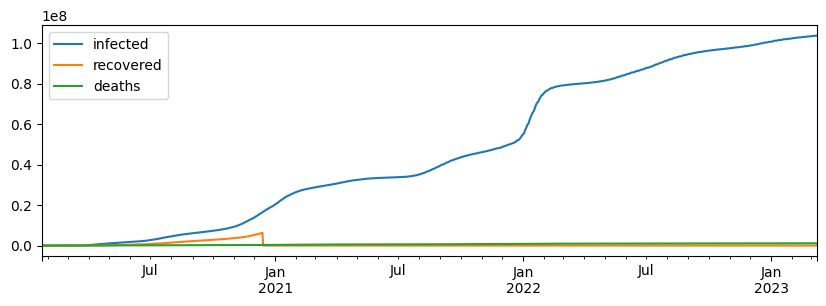

In [54]:
df.plot()
plt.show()

_Now let's compute the number of new infected people each day. This will allow us to see the spread at which pandemic progresses. The easiest way to do this is using diff._

In [57]:
import matplotlib.pyplot as plt

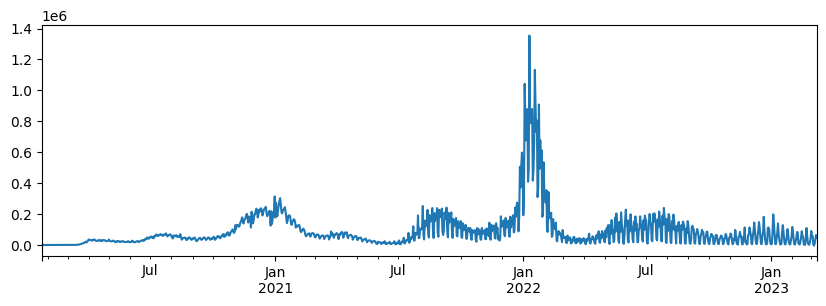

In [59]:
df['ninfected'] = df['infected'].diff()
df['ninfected'].plot()
plt.show()

let's look closer at one month

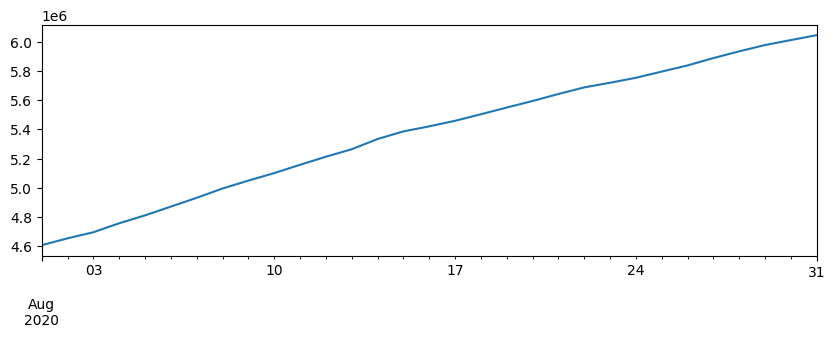

In [61]:
df[(df.index.year==2020) & (df.index.month==8)]['infected'].plot()
plt.show()

In order to be able to compare several countries, we might want to take the country's population into account, and compare the percentage of infected individuals with respected to country's population. in order to get country's population, let's load the dataset of countries.

In [63]:
countries = pd.read_csv(countries_dataset_url)
print(countries.head())

   UID iso2 iso3  code3  FIPS Admin2 Province_State Country_Region       Lat  \
0    4   AF  AFG    4.0   NaN    NaN            NaN    Afghanistan  33.93911   
1    8   AL  ALB    8.0   NaN    NaN            NaN        Albania  41.15330   
2   10   AQ  ATA   10.0   NaN    NaN            NaN     Antarctica -71.94990   
3   12   DZ  DZA   12.0   NaN    NaN            NaN        Algeria  28.03390   
4   20   AD  AND   20.0   NaN    NaN            NaN        Andorra  42.50630   

       Long_ Combined_Key  Population  
0  67.709953  Afghanistan  38928341.0  
1  20.168300      Albania   2877800.0  
2  23.347000   Antarctica         NaN  
3   1.659600      Algeria  43851043.0  
4   1.521800      Andorra     77265.0  
